# FBREF Web-scraping functions - player comps

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import klib as kb
import seaborn as sb
import matplotlib.pyplot as plt
import wes
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
import sys
import os
import wes
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
sys.path.append(os.path.abspath(os.pardir))

from src.fbref_analysis_functions import *

In [3]:
warnings.filterwarnings("ignore")

In [87]:
def compare_offensive_stats_three(x,y,z):
    
    warnings.filterwarnings("ignore")
    
    url_x = x
    url_y = y
    url_z = z
    
    page_x =requests.get(url_x)
    page_y =requests.get(url_y)
    page_z =requests.get(url_z)
    
    soup_x = BeautifulSoup(page_x.content, 'html.parser')
    soup_y = BeautifulSoup(page_y.content, 'html.parser')
    soup_z = BeautifulSoup(page_z.content, 'html.parser')
    
    name_x = [element.text for element in soup_x.find_all("span")]
    name_y = [element.text for element in soup_y.find_all("span")]
    name_z = [element.text for element in soup_z.find_all("span")]
    
    name_x = name_x[7]
    name_y = name_y[7]
    name_z = name_z[7]
    
    metric_names_x = []
    metric_names_y = []
    metric_names_z = []
    
    metric_values_x = []
    metric_values_y = []
    metric_values_z = []
    
    remove_content = ["'", "[", "]", ",", "%"]
    
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('th')[0].contents
        metric_names_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('th')[0].contents
        metric_names_y.append(first_column_y)
        
    for row in soup_z.findAll('table')[0].tbody.findAll('tr'):
        first_column_z = row.findAll('th')[0].contents
        metric_names_z.append(first_column_z)
        
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('td')[1].contents
        metric_values_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('td')[1].contents
        metric_values_y.append(first_column_y)
        
    for row in soup_z.findAll('table')[0].tbody.findAll('tr'):
        first_column_z = row.findAll('td')[1].contents
        metric_values_z.append(first_column_z)
        
    clean_left_x = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_x.append(left)

    clean_overall_x = []
    
    for item in clean_left_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_x.append(right)
    
    clean_x = []
    
    for item in clean_overall_x:
        item = item.replace("<","")
        clean_x.append(item)
        
    clean_left_y = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_y.append(left)

    clean_overall_y = []
    
    for item in clean_left_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_y.append(right)
    
    clean_y = []
    
    for item in clean_overall_y:
        item = item.replace("<","")
        clean_y.append(item)
        
        
    clean_left_z = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_z:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_z.append(left)

    clean_overall_z = []
    
    for item in clean_left_z:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_z.append(right)
    
    clean_z = []
    
    for item in clean_overall_z:
        item = item.replace("<","")
        clean_z.append(item)
        
    df_player_1 = pd.DataFrame()
    
    df_player_2 = pd.DataFrame()
    
    df_player_3 = pd.DataFrame()
    
    df_player_1['Name'] = name_x[0]
    df_player_1[metric_names_x[0]] = []
    df_player_1[metric_names_x[1]] = []
    df_player_1[metric_names_x[2]] = []
    df_player_1[metric_names_x[3]] = []
    df_player_1[metric_names_x[4]] = []
    df_player_1[metric_names_x[5]] = []
    df_player_1[metric_names_x[6]] = []
    df_player_1[metric_names_x[8]] = []
    df_player_1[metric_names_x[9]] = []
    df_player_1[metric_names_x[10]] = []
    df_player_1[metric_names_x[11]] = []
    df_player_1[metric_names_x[12]] = []
    df_player_1[metric_names_x[13]] = []
    df_player_1[metric_names_x[14]] = []
    df_player_1[metric_names_x[16]] = []
    df_player_1[metric_names_x[17]] = []
    df_player_1[metric_names_x[18]] = []
    df_player_1[metric_names_x[19]] = []
    df_player_1[metric_names_x[20]] = []
    df_player_1[metric_names_x[21]] = []
    
    df_player_2['Name'] = name_x[0]
    df_player_2[metric_names_y[0]] = []
    df_player_2[metric_names_y[1]] = []
    df_player_2[metric_names_y[2]] = []
    df_player_2[metric_names_y[3]] = []
    df_player_2[metric_names_y[4]] = []
    df_player_2[metric_names_y[5]] = []
    df_player_2[metric_names_y[6]] = []
    df_player_2[metric_names_y[8]] = []
    df_player_2[metric_names_y[9]] = []
    df_player_2[metric_names_y[10]] = []
    df_player_2[metric_names_y[11]] = []
    df_player_2[metric_names_y[12]] = []
    df_player_2[metric_names_y[13]] = []
    df_player_2[metric_names_y[14]] = []
    df_player_2[metric_names_y[16]] = []
    df_player_2[metric_names_y[17]] = []
    df_player_2[metric_names_y[18]] = []
    df_player_2[metric_names_y[19]] = []
    df_player_2[metric_names_y[20]] = []
    df_player_2[metric_names_y[21]] = []
    
    df_player_3['Name'] = name_z[0]
    df_player_3[metric_names_z[0]] = []
    df_player_3[metric_names_z[1]] = []
    df_player_3[metric_names_z[2]] = []
    df_player_3[metric_names_z[3]] = []
    df_player_3[metric_names_z[4]] = []
    df_player_3[metric_names_z[5]] = []
    df_player_3[metric_names_z[6]] = []
    df_player_3[metric_names_z[8]] = []
    df_player_3[metric_names_z[9]] = []
    df_player_3[metric_names_z[10]] = []
    df_player_3[metric_names_z[11]] = []
    df_player_3[metric_names_z[12]] = []
    df_player_3[metric_names_z[13]] = []
    df_player_3[metric_names_z[14]] = []
    df_player_3[metric_names_z[16]] = []
    df_player_3[metric_names_z[17]] = []
    df_player_3[metric_names_z[18]] = []
    df_player_3[metric_names_z[19]] = []
    df_player_3[metric_names_z[20]] = []
    df_player_3[metric_names_z[21]] = []
    
    df_player_1 = kb.clean_column_names(df_player_1)
    df_player_2 = kb.clean_column_names(df_player_2)
    df_player_3 = kb.clean_column_names(df_player_3)
        
    name_x = name_x
    non_penalty_goals_x = (clean_x[0])
    npx_g_x = clean_x[1]
    shots_total_x = clean_x[2]
    assists_x = clean_x[3]
    x_a_x = clean_x[4]
    npx_g_plus_x_a_x = clean_x[5] 
    shot_creating_actions_x = clean_x[6] 
    passes_attempted_x = clean_x[8] 
    pass_completion_percent_x = clean_x[9] 
    progressive_passes_x = clean_x[10] 
    progressive_carries_x = clean_x[11] 
    dribbles_completed_x = clean_x[12] 
    touches_att_pen_x = clean_x[13]
    progressive_passes_rec_x = clean_x[14] 
    pressures_x = clean_x[16] 
    tackles_x = clean_x[17] 
    interceptions_x = clean_x[18] 
    blocks_x = clean_x[19]
    clearances_x = clean_x[20]
    aerials_won_x = clean_x[21]
    
    df_player_1.loc[0] = [name_x, non_penalty_goals_x, npx_g_x, shots_total_x, assists_x, x_a_x, npx_g_plus_x_a_x, shot_creating_actions_x, passes_attempted_x, pass_completion_percent_x,
                       progressive_passes_x, progressive_carries_x, dribbles_completed_x, touches_att_pen_x, progressive_passes_rec_x, pressures_x, tackles_x, interceptions_x, blocks_x,
                       clearances_x, aerials_won_x]
    
    name_y = name_y
    non_penalty_goals_y = (clean_y[0])
    npx_g_y = clean_y[1]
    shots_total_y = clean_y[2]
    assists_y = clean_y[3]
    x_a_y = clean_y[4]
    npx_g_plus_x_a_y = clean_y[5] 
    shot_creating_actions_y = clean_y[6] 
    passes_attempted_y = clean_y[8] 
    pass_completion_percent_y = clean_y[9] 
    progressive_passes_y = clean_y[10] 
    progressive_carries_y = clean_y[11] 
    dribbles_completed_y = clean_y[12] 
    touches_att_pen_y = clean_y[13]
    progressive_passes_rec_y = clean_y[14] 
    pressures_y = clean_y[16] 
    tackles_y = clean_y[17] 
    interceptions_y = clean_y[18] 
    blocks_y = clean_y[19]
    clearances_y = clean_y[20]
    aerials_won_y = clean_y[21]
    
    df_player_2.loc[0] = [name_y, non_penalty_goals_y, npx_g_y, shots_total_y, assists_y, x_a_y, npx_g_plus_x_a_y, shot_creating_actions_y, passes_attempted_y, pass_completion_percent_y,
                       progressive_passes_y, progressive_carries_y, dribbles_completed_y, touches_att_pen_y, progressive_passes_rec_y, pressures_y, tackles_y, interceptions_y, blocks_y,
                       clearances_y, aerials_won_y]
    
    
    name_z = name_z
    non_penalty_goals_z = (clean_z[0])
    npx_g_z = clean_z[1]
    shots_total_z = clean_z[2]
    assists_z = clean_z[3]
    x_a_z = clean_z[4]
    npx_g_plus_x_a_z = clean_z[5] 
    shot_creating_actions_z = clean_z[6] 
    passes_attempted_z = clean_z[8] 
    pass_completion_percent_z = clean_z[9] 
    progressive_passes_z = clean_z[10] 
    progressive_carries_z = clean_z[11] 
    dribbles_completed_z = clean_z[12] 
    touches_att_pen_z = clean_z[13]
    progressive_passes_rec_z = clean_z[14] 
    pressures_z = clean_z[16] 
    tackles_z = clean_z[17] 
    interceptions_z = clean_z[18] 
    blocks_z = clean_z[19]
    clearances_z = clean_z[20]
    aerials_won_z = clean_z[21]
    
    df_player_3.loc[0] = [name_z, non_penalty_goals_z, npx_g_z, shots_total_z, assists_z, x_a_z, npx_g_plus_x_a_z, shot_creating_actions_z, passes_attempted_z, pass_completion_percent_z,
                       progressive_passes_z, progressive_carries_z, dribbles_completed_z, touches_att_pen_z, progressive_passes_rec_z, pressures_z, tackles_z, interceptions_z, blocks_z,
                       clearances_z, aerials_won_z]
    
    df_player_comp = pd.concat([df_player_1, df_player_2, df_player_3])
    
    df_player_offensive_comp = df_player_comp[['name', 'non_penalty_goals', 'npx_g', 'shots_total', 'assists', 'x_a', 'npx_g_plus_x_a', 'shot_creating_actions', 'pass_completion_percent',
                                              'progressive_passes', 'progressive_carries', 'dribbles_completed', 'touches_att_pen']]
    
    
    
    df_player_offensive_comp_plot = pd.DataFrame(index=np.arange(36), columns=np.arange(2))
    
    df_player_offensive_comp_plot.rename(columns={df_player_offensive_comp_plot.columns[0]: "Score - 0-100" }, inplace = True)
    
    df_player_offensive_comp_plot.rename(columns={df_player_offensive_comp_plot.columns[1]: "Metric" }, inplace = True)
    
    player_name = [(df_player_offensive_comp_plot.index >= 0) & (df_player_offensive_comp_plot.index < 12),
         (df_player_offensive_comp_plot.index >= 12)& (df_player_offensive_comp_plot.index < 24),
                  (df_player_offensive_comp_plot.index < 36)]

    player_name_paste = [name_x, name_y, name_z]

    df_player_offensive_comp_plot['Player'] = np.select(player_name, player_name_paste)
    
    
    average_x = [int(non_penalty_goals_x), int(npx_g_x), int(shots_total_x), int(assists_x),
                       int(x_a_x), int(npx_g_plus_x_a_x), int(shot_creating_actions_x), int(pass_completion_percent_x), int(progressive_passes_x),
                int(progressive_carries_x), int(dribbles_completed_x), int(touches_att_pen_x)]
    average_x = np.mean(average_x)
    
    
    average_y = [int(non_penalty_goals_y), int(npx_g_y), int(shots_total_y), int(assists_y),
                       int(x_a_y), int(npx_g_plus_x_a_y), int(shot_creating_actions_y), int(pass_completion_percent_y), int(progressive_passes_y),
                int(progressive_carries_y), int(dribbles_completed_y), int(touches_att_pen_y)]
    average_y = np.mean(average_y)
    
    
    average_z = [int(non_penalty_goals_z), int(npx_g_z), int(shots_total_z), int(assists_z),
                       int(x_a_z), int(npx_g_plus_x_a_z), int(shot_creating_actions_z), int(pass_completion_percent_z), int(progressive_passes_z),
                int(progressive_carries_z), int(dribbles_completed_z), int(touches_att_pen_z)]
    average_z = np.mean(average_z)
    
    df_player_offensive_comp_plot.at[0, 'Metric'] = 'Non_penalty_goals'
    df_player_offensive_comp_plot.at[1, 'Metric'] = 'Npx_g'
    df_player_offensive_comp_plot.at[2, 'Metric'] = 'Shots_total'
    df_player_offensive_comp_plot.at[3, 'Metric'] = 'Assists'
    df_player_offensive_comp_plot.at[4, 'Metric'] = 'X_a'
    df_player_offensive_comp_plot.at[5, 'Metric'] = 'Npx_g_plus_x_a'
    df_player_offensive_comp_plot.at[6, 'Metric'] = 'Shot_creating_actions'
    df_player_offensive_comp_plot.at[7, 'Metric'] = 'Pass_completion_percent'
    df_player_offensive_comp_plot.at[8, 'Metric'] = 'Progressive_passes'
    df_player_offensive_comp_plot.at[9, 'Metric'] = 'Progressive_carries'
    df_player_offensive_comp_plot.at[10, 'Metric'] = 'Dribbles_completed'
    df_player_offensive_comp_plot.at[11, 'Metric'] = 'Touches_att_pen'
    df_player_offensive_comp_plot.at[12, 'Metric'] = 'Non_penalty_goals'
    df_player_offensive_comp_plot.at[13, 'Metric'] = 'Npx_g'
    df_player_offensive_comp_plot.at[14, 'Metric'] = 'Shots_total'
    df_player_offensive_comp_plot.at[15, 'Metric'] = 'Assists'
    df_player_offensive_comp_plot.at[16, 'Metric'] = 'X_a'
    df_player_offensive_comp_plot.at[17, 'Metric'] = 'Npx_g_plus_x_a'
    df_player_offensive_comp_plot.at[18, 'Metric'] = 'Shot_creating_actions'
    df_player_offensive_comp_plot.at[19, 'Metric'] = 'Pass_completion_percent'
    df_player_offensive_comp_plot.at[20, 'Metric'] = 'Progressive_passes'
    df_player_offensive_comp_plot.at[21, 'Metric'] = 'Progressive_carries'
    df_player_offensive_comp_plot.at[22, 'Metric'] = 'Dribbles_completed'
    df_player_offensive_comp_plot.at[23, 'Metric'] = 'Touches_att_pen'
    df_player_offensive_comp_plot.at[24, 'Metric'] = 'Non_penalty_goals'
    df_player_offensive_comp_plot.at[25, 'Metric'] = 'Npx_g'
    df_player_offensive_comp_plot.at[26, 'Metric'] = 'Shots_total'
    df_player_offensive_comp_plot.at[27, 'Metric'] = 'Assists'
    df_player_offensive_comp_plot.at[28, 'Metric'] = 'X_a'
    df_player_offensive_comp_plot.at[29, 'Metric'] = 'Npx_g_plus_x_a'
    df_player_offensive_comp_plot.at[30, 'Metric'] = 'Shot_creating_actions'
    df_player_offensive_comp_plot.at[31, 'Metric'] = 'Pass_completion_percent'
    df_player_offensive_comp_plot.at[32, 'Metric'] = 'Progressive_passes'
    df_player_offensive_comp_plot.at[33, 'Metric'] = 'Progressive_carries'
    df_player_offensive_comp_plot.at[34, 'Metric'] = 'Dribbles_completed'
    df_player_offensive_comp_plot.at[35, 'Metric'] = 'Touches_att_pen'
    
    
    df_player_offensive_comp_plot.at[0, 'Score - 0-100'] = int(non_penalty_goals_x)
    df_player_offensive_comp_plot.at[1, 'Score - 0-100'] = int(npx_g_x)
    df_player_offensive_comp_plot.at[2, 'Score - 0-100'] = int(shots_total_x)
    df_player_offensive_comp_plot.at[3, 'Score - 0-100'] = int(assists_x)
    df_player_offensive_comp_plot.at[4, 'Score - 0-100'] =  int(x_a_x)
    df_player_offensive_comp_plot.at[5, 'Score - 0-100'] = int(npx_g_plus_x_a_x)
    df_player_offensive_comp_plot.at[6, 'Score - 0-100'] = int(shot_creating_actions_x)
    df_player_offensive_comp_plot.at[7, 'Score - 0-100'] = int(pass_completion_percent_x)
    df_player_offensive_comp_plot.at[8, 'Score - 0-100'] = int(progressive_passes_x)
    df_player_offensive_comp_plot.at[9, 'Score - 0-100'] = int(progressive_carries_x)
    df_player_offensive_comp_plot.at[10, 'Score - 0-100'] =  int(dribbles_completed_x)
    df_player_offensive_comp_plot.at[11, 'Score - 0-100'] = int(touches_att_pen_x)
    df_player_offensive_comp_plot.at[12, 'Score - 0-100'] = int(non_penalty_goals_y)
    df_player_offensive_comp_plot.at[13, 'Score - 0-100'] = int(npx_g_y)
    df_player_offensive_comp_plot.at[14, 'Score - 0-100'] = int(shots_total_y)
    df_player_offensive_comp_plot.at[15, 'Score - 0-100'] = int(assists_y)
    df_player_offensive_comp_plot.at[16, 'Score - 0-100'] =  int(x_a_y)
    df_player_offensive_comp_plot.at[17, 'Score - 0-100'] = int(npx_g_plus_x_a_y)
    df_player_offensive_comp_plot.at[18, 'Score - 0-100'] = int(shot_creating_actions_y)
    df_player_offensive_comp_plot.at[19, 'Score - 0-100'] = int(pass_completion_percent_y)
    df_player_offensive_comp_plot.at[20, 'Score - 0-100'] = int(progressive_passes_y)
    df_player_offensive_comp_plot.at[21, 'Score - 0-100'] = int(progressive_carries_y)
    df_player_offensive_comp_plot.at[22, 'Score - 0-100'] =  int(dribbles_completed_y)
    df_player_offensive_comp_plot.at[23, 'Score - 0-100'] = int(touches_att_pen_y)
    df_player_offensive_comp_plot.at[24, 'Score - 0-100'] = int(non_penalty_goals_z)
    df_player_offensive_comp_plot.at[25, 'Score - 0-100'] = int(npx_g_z)
    df_player_offensive_comp_plot.at[26, 'Score - 0-100'] = int(shots_total_z)
    df_player_offensive_comp_plot.at[27, 'Score - 0-100'] = int(assists_z)
    df_player_offensive_comp_plot.at[28, 'Score - 0-100'] =  int(x_a_z)
    df_player_offensive_comp_plot.at[29, 'Score - 0-100'] = int(npx_g_plus_x_a_z)
    df_player_offensive_comp_plot.at[30, 'Score - 0-100'] = int(shot_creating_actions_z)
    df_player_offensive_comp_plot.at[31, 'Score - 0-100'] = int(pass_completion_percent_z)
    df_player_offensive_comp_plot.at[32, 'Score - 0-100'] = int(progressive_passes_z)
    df_player_offensive_comp_plot.at[33, 'Score - 0-100'] = int(progressive_carries_z)
    df_player_offensive_comp_plot.at[34, 'Score - 0-100'] =  int(dribbles_completed_z)
    df_player_offensive_comp_plot.at[34, 'Score - 0-100'] = int(touches_att_pen_z)
    
    df_player_offensive_comp_plot = df_player_offensive_comp_plot[['Player', 'Metric', 'Score - 0-100']]
    
    ax = sb.catplot(x = 'Player', y = 'Score - 0-100', data = df_player_offensive_comp_plot, hue='Metric', s = 16, height=7, aspect=1)
    
    ax.set(ylim=(0, 100))

    la = {0: [average_x, name_x]}
    la_2 = {0: [average_y, name_y]}
    la_3 = {0: [average_z, name_z]}

    axes = ax.axes.flatten()

    for i, ax in enumerate(axes):
        ax.axhline(la[i][0], ls='--', c='green')
        
    for i, ax in enumerate(axes):
        ax.axhline(la_2[i][0], ls='--', c='purple')
        
    for i, ax in enumerate(axes):
        ax.axhline(la_3[i][0], ls='--', c='orange')
        
    ax.text(0, average_x, name_x, transform=ax.transData)  
    ax.text(1, average_y, name_y, transform=ax.transData)  
    ax.text(2, average_z, name_z, transform=ax.transData)  
    
    print(name_x,"is in the following percentile for offensive performance:",round(average_x,2))
    print(name_y, "is in the following percentile for offensive performance:",round(average_y,2))
    print(df_player_offensive_comp_plot)
    print(name_z, "is in the following percentile for offensive performance:",round(average_z,2))

Trent Alexander-Arnold is in the following percentile for offensive performance: 80.83
João Cancelo is in the following percentile for offensive performance: 88.08
                    Player                   Metric Score - 0-100
0   Trent Alexander-Arnold        Non_penalty_goals            59
1   Trent Alexander-Arnold                    Npx_g            78
2   Trent Alexander-Arnold              Shots_total            95
3   Trent Alexander-Arnold                  Assists            91
4   Trent Alexander-Arnold                      X_a            99
5   Trent Alexander-Arnold           Npx_g_plus_x_a            95
6   Trent Alexander-Arnold    Shot_creating_actions            97
7   Trent Alexander-Arnold  Pass_completion_percent            26
8   Trent Alexander-Arnold       Progressive_passes            99
9   Trent Alexander-Arnold      Progressive_carries            78
10  Trent Alexander-Arnold       Dribbles_completed            69
11  Trent Alexander-Arnold          Touches_

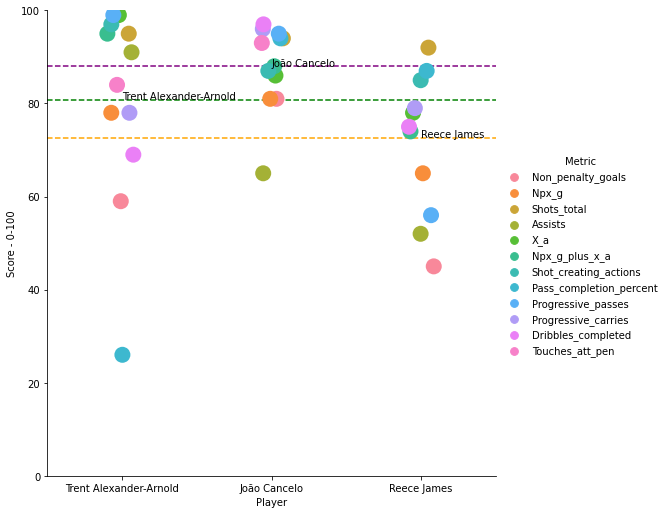

In [88]:
compare_offensive_stats_three('https://fbref.com/en/players/cd1acf9d/Trent-Alexander-Arnold', 'https://fbref.com/en/players/bd6351cd/Joao-Cancelo', 'https://fbref.com/en/players/1265a93a/Reece-James')

In [82]:
def compare_defensive_stats_three(x,y,z):
    
    warnings.filterwarnings("ignore")
    
    url_x = x
    url_y = y
    url_z = z
    
    page_x =requests.get(url_x)
    page_y =requests.get(url_y)
    page_z =requests.get(url_z)
    
    soup_x = BeautifulSoup(page_x.content, 'html.parser')
    soup_y = BeautifulSoup(page_y.content, 'html.parser')
    soup_z = BeautifulSoup(page_z.content, 'html.parser')
    
    name_x = [element.text for element in soup_x.find_all("span")]
    name_y = [element.text for element in soup_y.find_all("span")]
    name_z = [element.text for element in soup_z.find_all("span")]
    
    name_x = name_x[7]
    name_y = name_y[7]
    name_z = name_z[7]
    
    metric_names_x = []
    metric_names_y = []
    metric_names_z = []
    
    metric_values_x = []
    metric_values_y = []
    metric_values_z = []
    
    remove_content = ["'", "[", "]", ",", "%"]
    
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('th')[0].contents
        metric_names_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('th')[0].contents
        metric_names_y.append(first_column_y)
        
    for row in soup_z.findAll('table')[0].tbody.findAll('tr'):
        first_column_z = row.findAll('th')[0].contents
        metric_names_z.append(first_column_z)
        
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('td')[1].contents
        metric_values_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('td')[1].contents
        metric_values_y.append(first_column_y)
        
    for row in soup_z.findAll('table')[0].tbody.findAll('tr'):
        first_column_z = row.findAll('td')[1].contents
        metric_values_z.append(first_column_z)
        
    clean_left_x = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_x.append(left)

    clean_overall_x = []
    
    for item in clean_left_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_x.append(right)
    
    clean_x = []
    
    for item in clean_overall_x:
        item = item.replace("<","")
        clean_x.append(item)
        
    clean_left_y = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_y.append(left)

    clean_overall_y = []
    
    for item in clean_left_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_y.append(right)
    
    clean_y = []
    
    for item in clean_overall_y:
        item = item.replace("<","")
        clean_y.append(item)
        
        
    clean_left_z = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_z:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_z.append(left)

    clean_overall_z = []
    
    for item in clean_left_z:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_z.append(right)
    
    clean_z = []
    
    for item in clean_overall_z:
        item = item.replace("<","")
        clean_z.append(item)
        
    df_player_1 = pd.DataFrame()
    
    df_player_2 = pd.DataFrame()
    
    df_player_3 = pd.DataFrame()
    
    df_player_1['Name'] = name_x[0]
    df_player_1[metric_names_x[0]] = []
    df_player_1[metric_names_x[1]] = []
    df_player_1[metric_names_x[2]] = []
    df_player_1[metric_names_x[3]] = []
    df_player_1[metric_names_x[4]] = []
    df_player_1[metric_names_x[5]] = []
    df_player_1[metric_names_x[6]] = []
    df_player_1[metric_names_x[8]] = []
    df_player_1[metric_names_x[9]] = []
    df_player_1[metric_names_x[10]] = []
    df_player_1[metric_names_x[11]] = []
    df_player_1[metric_names_x[12]] = []
    df_player_1[metric_names_x[13]] = []
    df_player_1[metric_names_x[14]] = []
    df_player_1[metric_names_x[16]] = []
    df_player_1[metric_names_x[17]] = []
    df_player_1[metric_names_x[18]] = []
    df_player_1[metric_names_x[19]] = []
    df_player_1[metric_names_x[20]] = []
    df_player_1[metric_names_x[21]] = []
    
    df_player_2['Name'] = name_x[0]
    df_player_2[metric_names_y[0]] = []
    df_player_2[metric_names_y[1]] = []
    df_player_2[metric_names_y[2]] = []
    df_player_2[metric_names_y[3]] = []
    df_player_2[metric_names_y[4]] = []
    df_player_2[metric_names_y[5]] = []
    df_player_2[metric_names_y[6]] = []
    df_player_2[metric_names_y[8]] = []
    df_player_2[metric_names_y[9]] = []
    df_player_2[metric_names_y[10]] = []
    df_player_2[metric_names_y[11]] = []
    df_player_2[metric_names_y[12]] = []
    df_player_2[metric_names_y[13]] = []
    df_player_2[metric_names_y[14]] = []
    df_player_2[metric_names_y[16]] = []
    df_player_2[metric_names_y[17]] = []
    df_player_2[metric_names_y[18]] = []
    df_player_2[metric_names_y[19]] = []
    df_player_2[metric_names_y[20]] = []
    df_player_2[metric_names_y[21]] = []
    
    df_player_3['Name'] = name_z[0]
    df_player_3[metric_names_z[0]] = []
    df_player_3[metric_names_z[1]] = []
    df_player_3[metric_names_z[2]] = []
    df_player_3[metric_names_z[3]] = []
    df_player_3[metric_names_z[4]] = []
    df_player_3[metric_names_z[5]] = []
    df_player_3[metric_names_z[6]] = []
    df_player_3[metric_names_z[8]] = []
    df_player_3[metric_names_z[9]] = []
    df_player_3[metric_names_z[10]] = []
    df_player_3[metric_names_z[11]] = []
    df_player_3[metric_names_z[12]] = []
    df_player_3[metric_names_z[13]] = []
    df_player_3[metric_names_z[14]] = []
    df_player_3[metric_names_z[16]] = []
    df_player_3[metric_names_z[17]] = []
    df_player_3[metric_names_z[18]] = []
    df_player_3[metric_names_z[19]] = []
    df_player_3[metric_names_z[20]] = []
    df_player_3[metric_names_z[21]] = []
    
    df_player_1 = kb.clean_column_names(df_player_1)
    df_player_2 = kb.clean_column_names(df_player_2)
    df_player_3 = kb.clean_column_names(df_player_3)
        
    name_x = name_x
    non_penalty_goals_x = (clean_x[0])
    npx_g_x = clean_x[1]
    shots_total_x = clean_x[2]
    assists_x = clean_x[3]
    x_a_x = clean_x[4]
    npx_g_plus_x_a_x = clean_x[5] 
    shot_creating_actions_x = clean_x[6] 
    passes_attempted_x = clean_x[8] 
    pass_completion_percent_x = clean_x[9] 
    progressive_passes_x = clean_x[10] 
    progressive_carries_x = clean_x[11] 
    dribbles_completed_x = clean_x[12] 
    touches_att_pen_x = clean_x[13]
    progressive_passes_rec_x = clean_x[14] 
    pressures_x = clean_x[16] 
    tackles_x = clean_x[17] 
    interceptions_x = clean_x[18] 
    blocks_x = clean_x[19]
    clearances_x = clean_x[20]
    aerials_won_x = clean_x[21]
    
    df_player_1.loc[0] = [name_x, non_penalty_goals_x, npx_g_x, shots_total_x, assists_x, x_a_x, npx_g_plus_x_a_x, shot_creating_actions_x, passes_attempted_x, pass_completion_percent_x,
                       progressive_passes_x, progressive_carries_x, dribbles_completed_x, touches_att_pen_x, progressive_passes_rec_x, pressures_x, tackles_x, interceptions_x, blocks_x,
                       clearances_x, aerials_won_x]
    
    name_y = name_y
    non_penalty_goals_y = (clean_y[0])
    npx_g_y = clean_y[1]
    shots_total_y = clean_y[2]
    assists_y = clean_y[3]
    x_a_y = clean_y[4]
    npx_g_plus_x_a_y = clean_y[5] 
    shot_creating_actions_y = clean_y[6] 
    passes_attempted_y = clean_y[8] 
    pass_completion_percent_y = clean_y[9] 
    progressive_passes_y = clean_y[10] 
    progressive_carries_y = clean_y[11] 
    dribbles_completed_y = clean_y[12] 
    touches_att_pen_y = clean_y[13]
    progressive_passes_rec_y = clean_y[14] 
    pressures_y = clean_y[16] 
    tackles_y = clean_y[17] 
    interceptions_y = clean_y[18] 
    blocks_y = clean_y[19]
    clearances_y = clean_y[20]
    aerials_won_y = clean_y[21]
    
    df_player_2.loc[0] = [name_y, non_penalty_goals_y, npx_g_y, shots_total_y, assists_y, x_a_y, npx_g_plus_x_a_y, shot_creating_actions_y, passes_attempted_y, pass_completion_percent_y,
                       progressive_passes_y, progressive_carries_y, dribbles_completed_y, touches_att_pen_y, progressive_passes_rec_y, pressures_y, tackles_y, interceptions_y, blocks_y,
                       clearances_y, aerials_won_y]
    
    name_z = name_z
    non_penalty_goals_z = (clean_z[0])
    npx_g_z = clean_z[1]
    shots_total_z = clean_z[2]
    assists_z = clean_z[3]
    x_a_z = clean_z[4]
    npx_g_plus_x_a_z = clean_z[5] 
    shot_creating_actions_z = clean_z[6] 
    passes_attempted_z = clean_z[8] 
    pass_completion_percent_z = clean_z[9] 
    progressive_passes_z = clean_z[10] 
    progressive_carries_z = clean_z[11] 
    dribbles_completed_z = clean_z[12] 
    touches_att_pen_z = clean_z[13]
    progressive_passes_rec_z = clean_z[14] 
    pressures_z = clean_z[16] 
    tackles_z = clean_z[17] 
    interceptions_z = clean_z[18] 
    blocks_z = clean_z[19]
    clearances_z = clean_z[20]
    aerials_won_z = clean_z[21]
    
    df_player_3.loc[0] = [name_z, non_penalty_goals_z, npx_g_z, shots_total_z, assists_z, x_a_z, npx_g_plus_x_a_z, shot_creating_actions_z, passes_attempted_z, pass_completion_percent_z,
                       progressive_passes_z, progressive_carries_z, dribbles_completed_z, touches_att_pen_z, progressive_passes_rec_z, pressures_z, tackles_z, interceptions_z, blocks_z,
                       clearances_z, aerials_won_z]
    
    df_player_comp = pd.concat([df_player_1, df_player_2, df_player_3])
    
    df_player_defensive_comp = df_player_comp[['name','pressures', 'tackles', 'interceptions', 'blocks',
                       'clearances', 'aerials_won']]
    
    df_player_defensive_comp_plot = pd.DataFrame(index=np.arange(18), columns=np.arange(2))
    
    df_player_defensive_comp_plot.rename(columns={df_player_defensive_comp_plot.columns[0]: "Score - 0-100" }, inplace = True)
    
    df_player_defensive_comp_plot.rename(columns={df_player_defensive_comp_plot.columns[1]: "Metric" }, inplace = True)
    
    player_name = [(df_player_defensive_comp_plot.index >= 0) & (df_player_defensive_comp_plot.index < 6),
         (df_player_defensive_comp_plot.index >= 6)&(df_player_defensive_comp_plot.index < 12),
                  (df_player_defensive_comp_plot.index >= 12)]

    player_name_paste = [name_x, name_y, name_z]

    df_player_defensive_comp_plot['Player'] = np.select(player_name, player_name_paste)
    
    
    average_x = [int(pressures_x), int(tackles_x), int(interceptions_x), int(blocks_x),
                       int(clearances_x), int(aerials_won_x)]
    average_x = np.mean(average_x)
    
    
    average_y = [int(pressures_y), int(tackles_y), int(interceptions_y), int(blocks_y),
                       int(clearances_y), int(aerials_won_y)]
    average_y = np.mean(average_y)
    
    
    average_z = [int(pressures_z), int(tackles_z), int(interceptions_z), int(blocks_z),
                       int(clearances_z), int(aerials_won_z)]
    average_z = np.mean(average_z)
    
    df_player_defensive_comp_plot.at[0, 'Metric'] = 'Pressures'
    df_player_defensive_comp_plot.at[1, 'Metric'] = 'Tackles'
    df_player_defensive_comp_plot.at[2, 'Metric'] = 'Interceptions'
    df_player_defensive_comp_plot.at[3, 'Metric'] = 'Blocks'
    df_player_defensive_comp_plot.at[4, 'Metric'] = 'Clearances'
    df_player_defensive_comp_plot.at[5, 'Metric'] = 'Ariels Won'
    df_player_defensive_comp_plot.at[6, 'Metric'] = 'Pressures'
    df_player_defensive_comp_plot.at[7, 'Metric'] = 'Tackles'
    df_player_defensive_comp_plot.at[8, 'Metric'] = 'Interceptions'
    df_player_defensive_comp_plot.at[9, 'Metric'] = 'Blocks'
    df_player_defensive_comp_plot.at[10, 'Metric'] = 'Clearances'
    df_player_defensive_comp_plot.at[11, 'Metric'] = 'Ariels Won'
    df_player_defensive_comp_plot.at[12, 'Metric'] = 'Pressures'
    df_player_defensive_comp_plot.at[13, 'Metric'] = 'Tackles'
    df_player_defensive_comp_plot.at[14, 'Metric'] = 'Interceptions'
    df_player_defensive_comp_plot.at[15, 'Metric'] = 'Blocks'
    df_player_defensive_comp_plot.at[16, 'Metric'] = 'Clearances'
    df_player_defensive_comp_plot.at[17, 'Metric'] = 'Ariels Won'

    
    df_player_defensive_comp_plot.at[0, 'Score - 0-100'] = int(pressures_x)
    df_player_defensive_comp_plot.at[1, 'Score - 0-100'] = int(tackles_x)
    df_player_defensive_comp_plot.at[2, 'Score - 0-100'] = int(interceptions_x)
    df_player_defensive_comp_plot.at[3, 'Score - 0-100'] = int(blocks_x)
    df_player_defensive_comp_plot.at[4, 'Score - 0-100'] = int(clearances_x)
    df_player_defensive_comp_plot.at[5, 'Score - 0-100'] = int(aerials_won_x)
    df_player_defensive_comp_plot.at[6, 'Score - 0-100'] = int(pressures_y)
    df_player_defensive_comp_plot.at[7, 'Score - 0-100'] = int(tackles_y)
    df_player_defensive_comp_plot.at[8, 'Score - 0-100'] = int(interceptions_y)
    df_player_defensive_comp_plot.at[9, 'Score - 0-100'] = int(blocks_y)
    df_player_defensive_comp_plot.at[10, 'Score - 0-100'] = int(clearances_y)
    df_player_defensive_comp_plot.at[11, 'Score - 0-100'] = int(aerials_won_y)
    df_player_defensive_comp_plot.at[12, 'Score - 0-100'] = int(pressures_z)
    df_player_defensive_comp_plot.at[13, 'Score - 0-100'] = int(tackles_z)
    df_player_defensive_comp_plot.at[14, 'Score - 0-100'] = int(interceptions_z)
    df_player_defensive_comp_plot.at[15, 'Score - 0-100'] = int(blocks_z)
    df_player_defensive_comp_plot.at[16, 'Score - 0-100'] = int(clearances_z)
    df_player_defensive_comp_plot.at[17, 'Score - 0-100'] = int(aerials_won_z)
    
    df_player_defensive_comp_plot = df_player_defensive_comp_plot[['Player', 'Metric', 'Score - 0-100']]
    
    ax = sb.catplot(x = 'Player', y = 'Score - 0-100', data = df_player_defensive_comp_plot, hue='Metric', s = 16, height=7, aspect=1)
    
    ax.set(ylim=(0, 100))

    la = {0: [average_x, name_x]}
    la_2 = {0: [average_y, name_y]}
    la_3 = {0: [average_z, name_z]}

    axes = ax.axes.flatten()

    for i, ax in enumerate(axes):
        ax.axhline(la[i][0], ls='--', c='green')
        
    for i, ax in enumerate(axes):
        ax.axhline(la_2[i][0], ls='--', c='purple')
        
    for i, ax in enumerate(axes):
        ax.axhline(la_3[i][0], ls='--', c='orange')
        
    ax.text(0, average_x, name_x, transform=ax.transData)  
    ax.text(1, average_y, name_y, transform=ax.transData) 
    ax.text(2, average_z, name_z, transform=ax.transData) 
    
    print(name_x,"is in the following percentile for defensive performance:",round(average_x,2))
    print(name_y, "is in the following percentile for defensive performance:",round(average_y,2))
    print(name_z, "is in the following percentile for defensive performance:",round(average_z,2))
    print(df_player_defensive_comp_plot)

Trent Alexander-Arnold is in the following percentile for defensive performance: 25.67
João Cancelo is in the following percentile for defensive performance: 55.33
Reece James is in the following percentile for defensive performance: 70.67
                    Player         Metric Score - 0-100
0   Trent Alexander-Arnold      Pressures            13
1   Trent Alexander-Arnold        Tackles            27
2   Trent Alexander-Arnold  Interceptions            79
3   Trent Alexander-Arnold         Blocks             5
4   Trent Alexander-Arnold     Clearances            29
5   Trent Alexander-Arnold     Ariels Won             1
6             João Cancelo      Pressures            50
7             João Cancelo        Tackles            88
8             João Cancelo  Interceptions            96
9             João Cancelo         Blocks            14
10            João Cancelo     Clearances            10
11            João Cancelo     Ariels Won            74
12             Reece James      

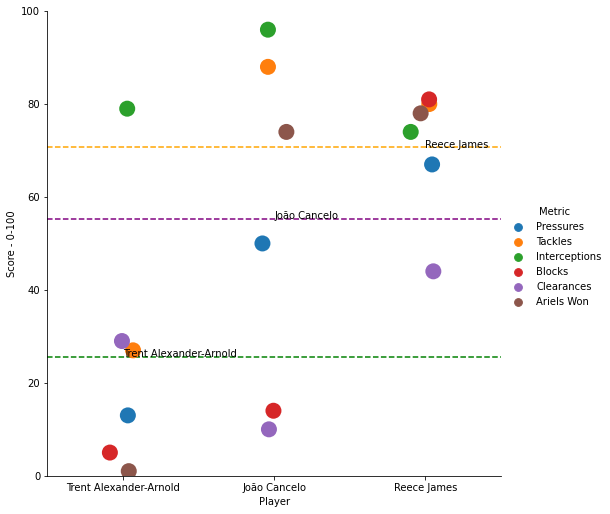

In [83]:
compare_defensive_stats_three('https://fbref.com/en/players/cd1acf9d/Trent-Alexander-Arnold', 'https://fbref.com/en/players/bd6351cd/Joao-Cancelo', 'https://fbref.com/en/players/1265a93a/Reece-James')

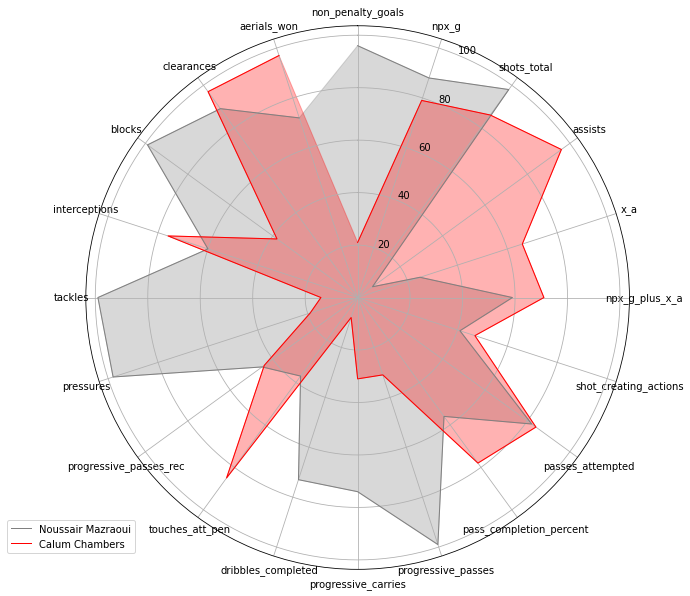

In [75]:
compare_players_percentile('https://fbref.com/en/players/b74277a0/Noussair-Mazraoui','https://fbref.com/en/players/dc6f5bdd/Calum-Chambers')

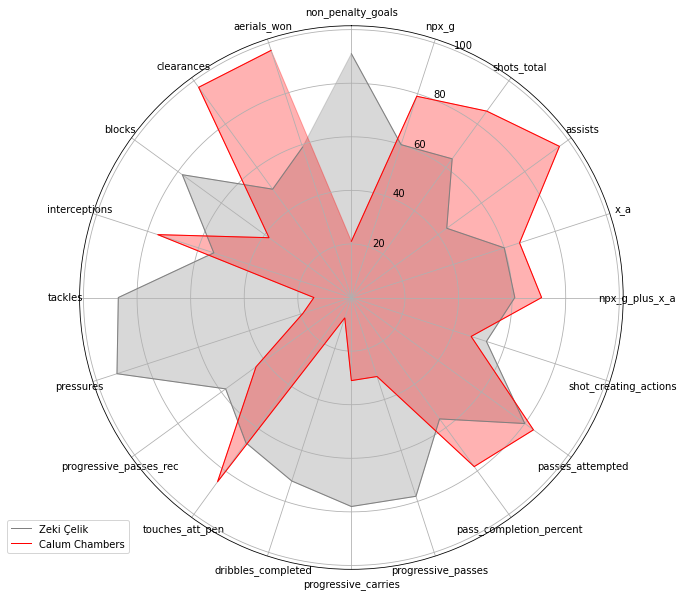

In [78]:
compare_players_percentile('https://fbref.com/en/players/31a62dc7/Zeki-Celik','https://fbref.com/en/players/dc6f5bdd/Calum-Chambers')

In [ ]:
›